In [44]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
sns.set_context("paper", font_scale=1.4)

from scripts import lockdown_mlm as mlm

# Define some constants and options
## variables
dep_vars = ["Natural", "Traffic", "Human",  "ISOPleasant", "ISOEventful"]
acoustic_vars = ["PA", "N5", "S", "R", "I", "FS", "T", "LAeq", "LA10_LA90", "LCeq_LAeq", "SIL3"]
locations = ["CamdenTown", "EustonTap", "MarchmontGarden", "MonumentoGaribaldi", "PancrasLock", "RegentsParkFields", "RegentsParkJapan", "RussellSq", "SanMarco", "StPaulsCross", "StPaulsRow", "TateModern", "TorringtonSq"]

# ##################################################################
# Load Data

DATA_DIR = Path("data")
RESULTS_DIR = Path("results")

ssidData = pd.read_excel(DATA_DIR.joinpath("2021-05-18/SSID Europe Database V1.0.xlsx"))
ssidData = ssidData.rename(columns={
    "PA(Zwicker)": "PA",
    "Loudness_N5(soneGF)": "N5",
    "Sharpness_S(acum)": "S",
    "Rough_HM_R(asper)": "R",
    "I_HM_I(iu)": "I",
    "FS_(vacil)": "FS",
    "Ton_HM_Avg,arith(tuHMS)": "T",
    "LAeq_L(A)(dB(SPL))": "LAeq",
    "LA10_LA90(dB(SPL))": "LA10_LA90",
    "LCeq_LAeq(dB(SPL))": "LCeq_LAeq",
    "SIL3_Avg,arith(dB(SPL))": "SIL3"
})
ssidData = ssidData[ssidData.LocationID.isin(locations)]


features = ["LocationID", "SessionID", "GroupID", "Lockdown"]
features = features + dep_vars + acoustic_vars
ssidData = ssidData[features]

prelockdownData = ssidData[ssidData.Lockdown == 0]
lockdownData = pd.read_csv(RESULTS_DIR.joinpath("2021-05-19/Predicted Lockdown Data_18766.csv"), index_col=0)

ordered_locations = sorted(set(prelockdownData.LocationID))


## Combining data into one dataframe

In [45]:
combinedData = pd.concat([prelockdownData, lockdownData])


### Location means of soundscape assessments Pre Lockdown (==0, Actual) and During Lockdown (==1, Predicted)

In [49]:
prelockdown_summary = prelockdownData[['LocationID', 'ISOPleasant', 'ISOEventful', 'Lockdown']].groupby("LocationID").mean()
lockdown_summary = lockdownData[['LocationID', 'ISOPleasant', 'ISOEventful', 'Lockdown']].groupby("LocationID").mean()

summaries = pd.concat([prelockdown_summary, lockdown_summary])
summaries['LocationID'] = summaries.index.values

In [50]:
prelockdown_summary['LocationID'] = prelockdown_summary.index.values
prelockdown_summary

,ISOPleasant,ISOEventful,Lockdown,LocationID
LocationID,,,,
CamdenTown,-0.102568,0.364104,0,CamdenTown
EustonTap,-0.211265,0.190240,0,EustonTap
MarchmontGarden,0.276441,-0.036175,0,MarchmontGarden
MonumentoGaribaldi,0.421031,-0.006541,0,MonumentoGaribaldi
PancrasLock,0.250971,0.075447,0,PancrasLock
RegentsParkFields,0.501111,-0.049918,0,RegentsParkFields
RegentsParkJapan,0.656213,-0.006085,0,RegentsParkJapan
RussellSq,0.478569,0.051756,0,RussellSq
SanMarco,0.214382,0.368535,0,SanMarco


In [51]:
lockdown_summary['LocationID'] = lockdown_summary.index.values
lockdown_summary

,ISOPleasant,ISOEventful,Lockdown,LocationID
LocationID,,,,
CamdenTown,-0.026083,0.315014,1,CamdenTown
EustonTap,-0.153874,0.198320,1,EustonTap
MarchmontGarden,0.247818,-0.111030,1,MarchmontGarden
MonumentoGaribaldi,0.331442,0.031939,1,MonumentoGaribaldi
PancrasLock,0.227149,0.014163,1,PancrasLock
RegentsParkFields,0.503935,-0.165246,1,RegentsParkFields
RegentsParkJapan,0.604362,-0.042943,1,RegentsParkJapan
RussellSq,0.510821,0.051229,1,RussellSq
SanMarco,0.347282,-0.263247,1,SanMarco


### Change in circumplex soundscape position during Lockdown

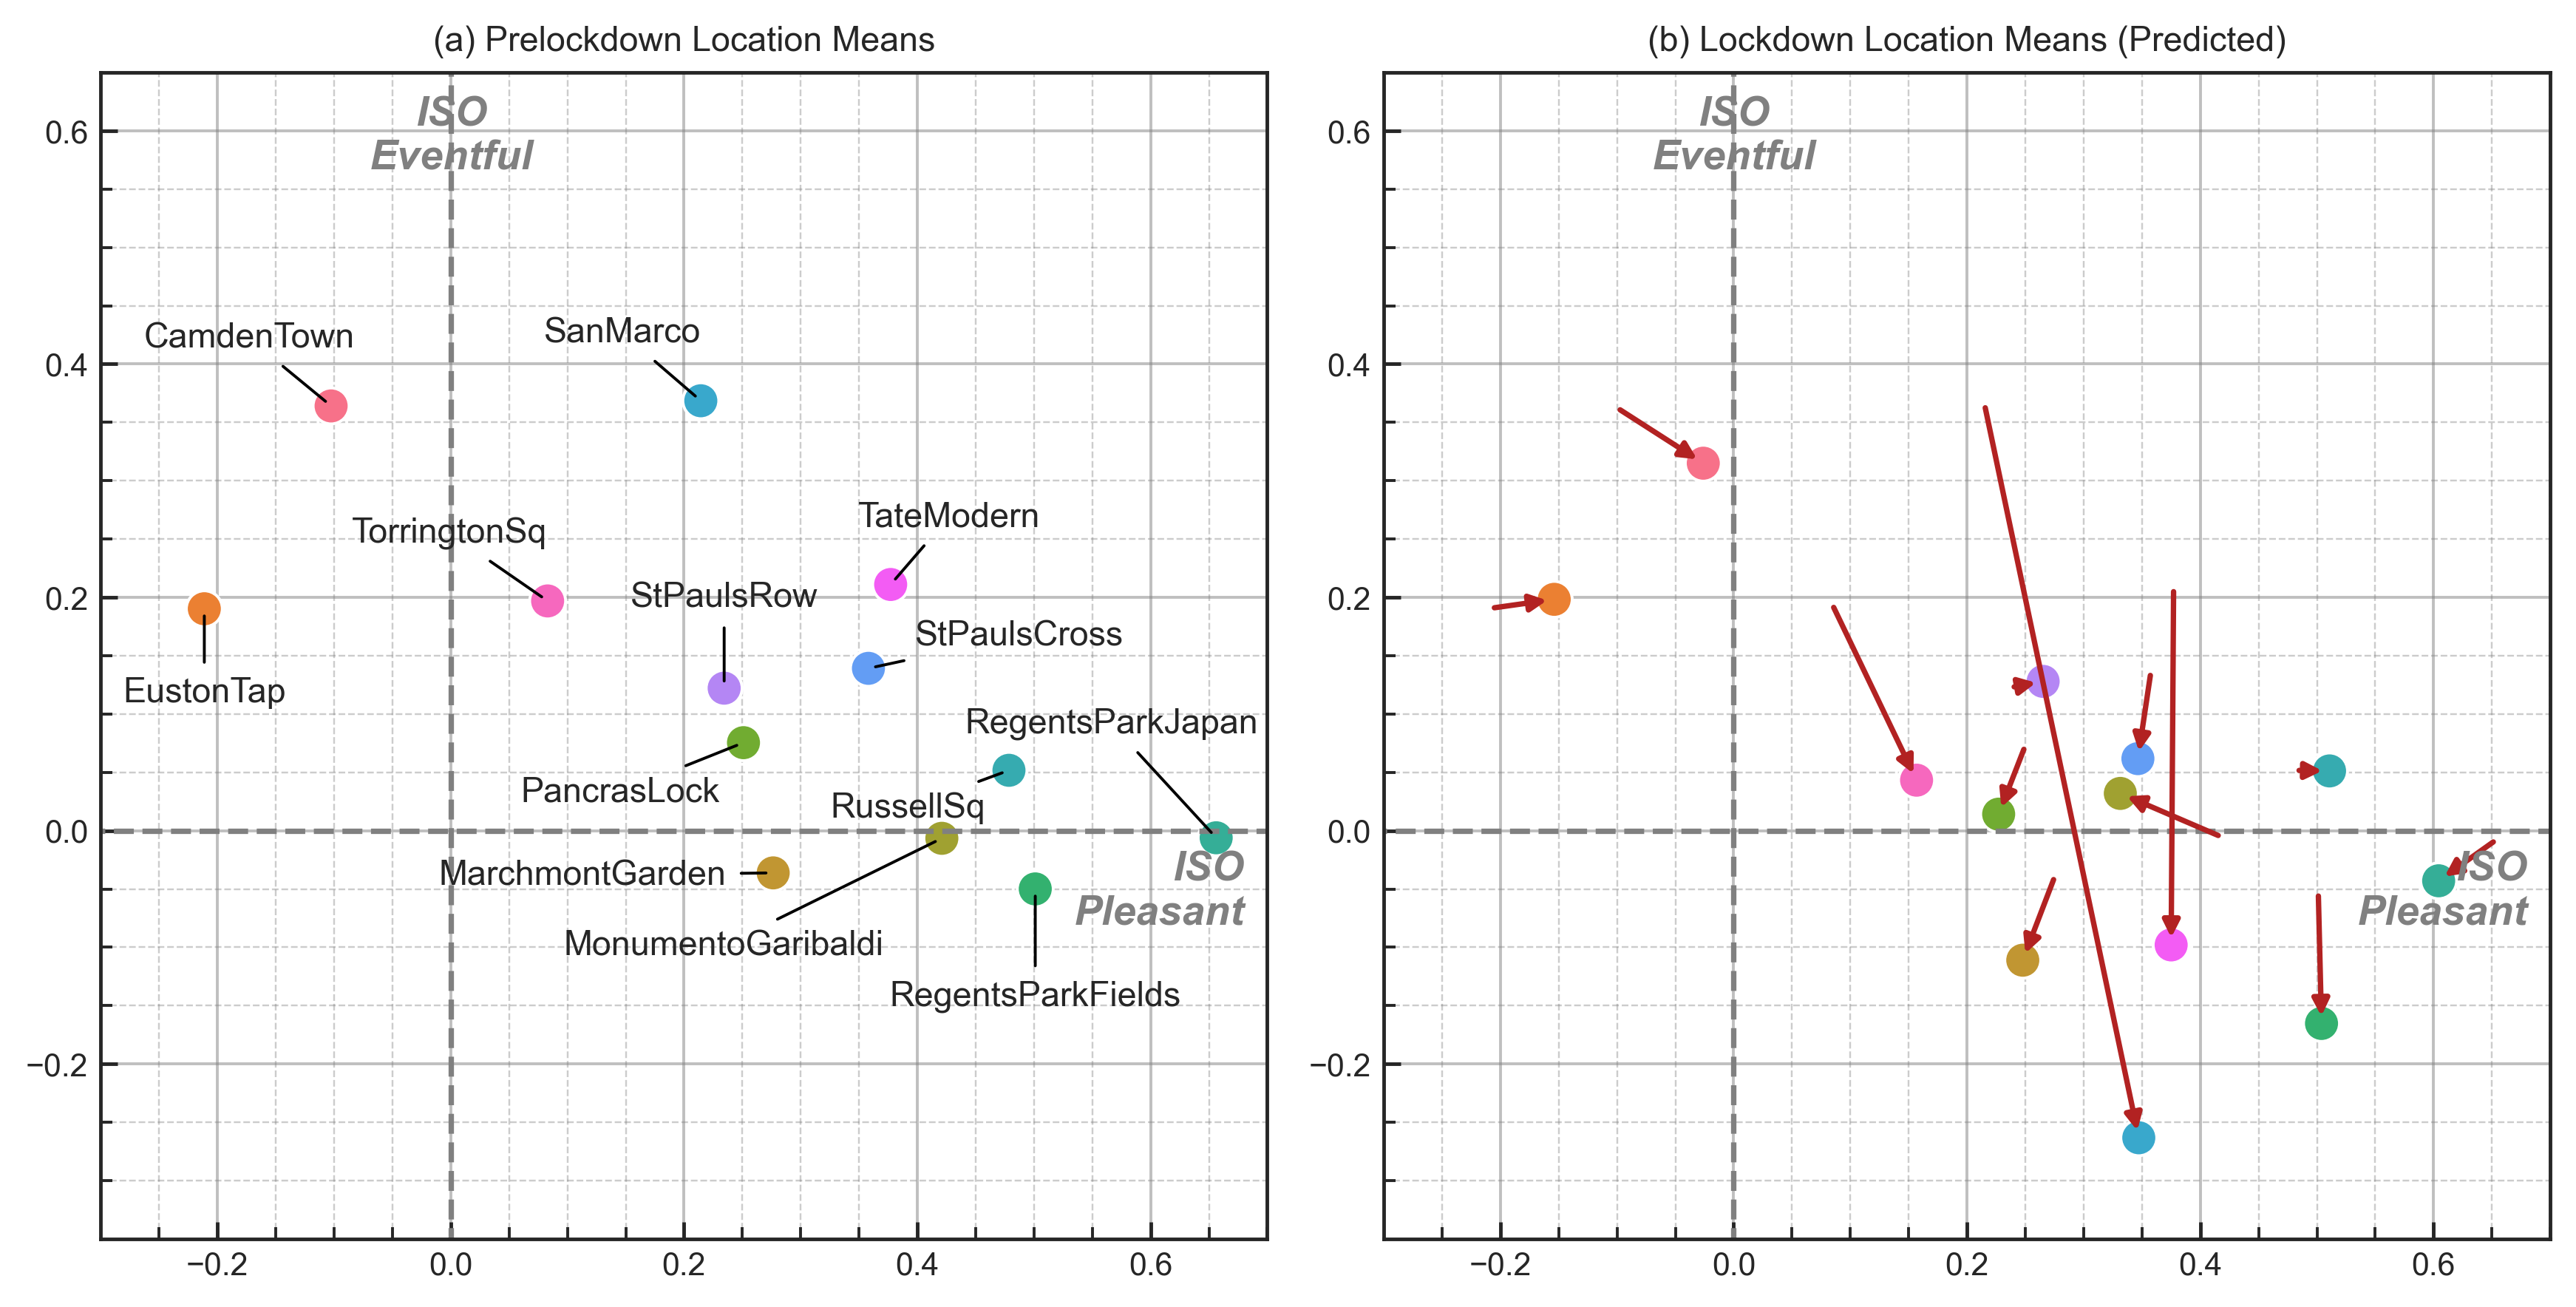

In [115]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper")
sns.set_palette("Blues")
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
fig = plt.figure(figsize=(10, 10))
plt.rcParams['figure.dpi'] = 350 # 200 e.g. is really fine, but slower

line_weights = 1.5

ax_1 = fig.add_subplot(221, aspect="equal", xlim=(-0.3, 0.7), ylim=(-0.35, 0.65))
ax_2 = fig.add_subplot(222, aspect="equal", xlim=(-0.3, 0.7), ylim=(-0.35, 0.65))

ax_1.title.set_text('(a) Prelockdown Location Means')
ax_2.title.set_text('(b) Lockdown Location Means (Predicted)')

sns.scatterplot(
    data=prelockdown_summary,
    x="ISOPleasant",
    y="ISOEventful",
    hue="LocationID",
    s=100,
    ax=ax_1,
    legend=False,
    palette=sns.color_palette('husl', 13)
)

sns.scatterplot(
    data=lockdown_summary,
    x="ISOPleasant",
    y="ISOEventful",
    hue="LocationID",
    s=100,
    ax=ax_2,
    legend=False,
    palette=sns.color_palette('husl', 13)
)
for i in range(len(lockdown_summary['LocationID'])):
    ax_2.annotate(
        text="",
        xy=(lockdown_summary['ISOPleasant'][i], lockdown_summary['ISOEventful'][i]),
        xytext=(prelockdown_summary['ISOPleasant'][i], prelockdown_summary['ISOEventful'][i]),
        arrowprops=dict(arrowstyle="-|>", color='firebrick', lw=line_weights),
    )


for axes in (ax_1, ax_2):
    # grids and ticks
    axes.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    axes.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())

    axes.grid(b=True, which="major", color="grey", alpha=0.5)
    axes.grid(
        b=True,
        which="minor",
        color="grey",
        linestyle="dashed",
        linewidth=0.5,
        alpha=0.4,
    )

    # hide axis labels
    axes.xaxis.label.set_visible(False)
    axes.yaxis.label.set_visible(False)

    # Add lines and labels for circumplex model
    axes.plot(  # horizontal line
        [-1, 1],
        [0, 0],
        # transform=axes.transAxes,
        linestyle="dashed",
        color="grey",
        alpha=1,
        lw=line_weights
    )
    axes.plot(  # vertical line
        [0, 0],
        [1, -1],
        # transform=axes.transAxes,
        linestyle="dashed",
        color="grey",
        alpha=1,
        lw=line_weights
    )
    fontdict = {
        "fontstyle": "italic",
        "fontsize": "large",
        "fontweight": "bold",
        "c": "grey",
        "alpha": 1,
    }

    axes.text(  # ISO Pleasant label
        x=0.98,
        y=0.27,
        s="ISO\nPleasant",
        ha="right",
        fontdict=fontdict,
        transform=axes.transAxes,
    )
    axes.text(  # ISO Eventful label
        x=0.3,
        y=0.98,
        s="ISO\nEventful",
        ha="center",
        va="top",
        fontdict=fontdict,
        transform=axes.transAxes,
    )


def iso_annotations(axes, loc_idx, x_adj=0, y_adj=0, ha="center"):
    axes.annotate(
        text=prelockdown_summary["LocationID"][loc_idx],
        xy=(prelockdown_summary["ISOPleasant"][loc_idx], prelockdown_summary["ISOEventful"][loc_idx]),
        xytext=(
            prelockdown_summary["ISOPleasant"][loc_idx] + x_adj,
            prelockdown_summary["ISOEventful"][loc_idx] + y_adj,
        ),
        ha=ha,
        arrowprops=dict(arrowstyle="-", ec="black"),
        annotation_clip=True,
    )

iso_annotations(ax_1, 0, x_adj=0.02, y_adj=0.05, ha="right")  # Camden Town
iso_annotations(ax_1, 1, x_adj=-0, y_adj=-0.08, ha="center")  # Euston Tap
iso_annotations(ax_1, 2, x_adj=-0.04, y_adj=-0.01, ha='right')  # Marchmont Garden
iso_annotations(ax_1, 3, x_adj=-0.05, y_adj=-0.1, ha="right")  # MonumentoGaribaldi
iso_annotations(ax_1, 4, x_adj=-0.02, y_adj=-0.05, ha="right")  # St Pancras Lock
iso_annotations(ax_1, 5, x_adj=-0, y_adj=-0.1, ha="center")  # Regents Park Fields
iso_annotations(ax_1, 6, x_adj=-0.09, y_adj=0.09, ha="center")  # Regents Park Japan
iso_annotations(ax_1, 7, x_adj=-0.02, y_adj=-0.04, ha="right")  # Russell sq
iso_annotations(ax_1, 8, x_adj=-0, y_adj=0.05, ha="right")  # SanMarco
iso_annotations(ax_1, 9, x_adj=0.04, y_adj=0.02, ha='left')  # St Pauls Cross
iso_annotations(ax_1, 10, x_adj=-0, y_adj=0.07, ha='center')  # St Pauls Row
iso_annotations(ax_1, 11, x_adj=0.05, y_adj=0.05, ha='center')  # Tate Modern
iso_annotations(ax_1, 12, x_adj=-0, y_adj=0.05, ha='right')  # Torrington Sq

plt.tight_layout()
plt.show()
# plt.savefig('Pre-and-post-Lockdown-Circumplex.jpg')


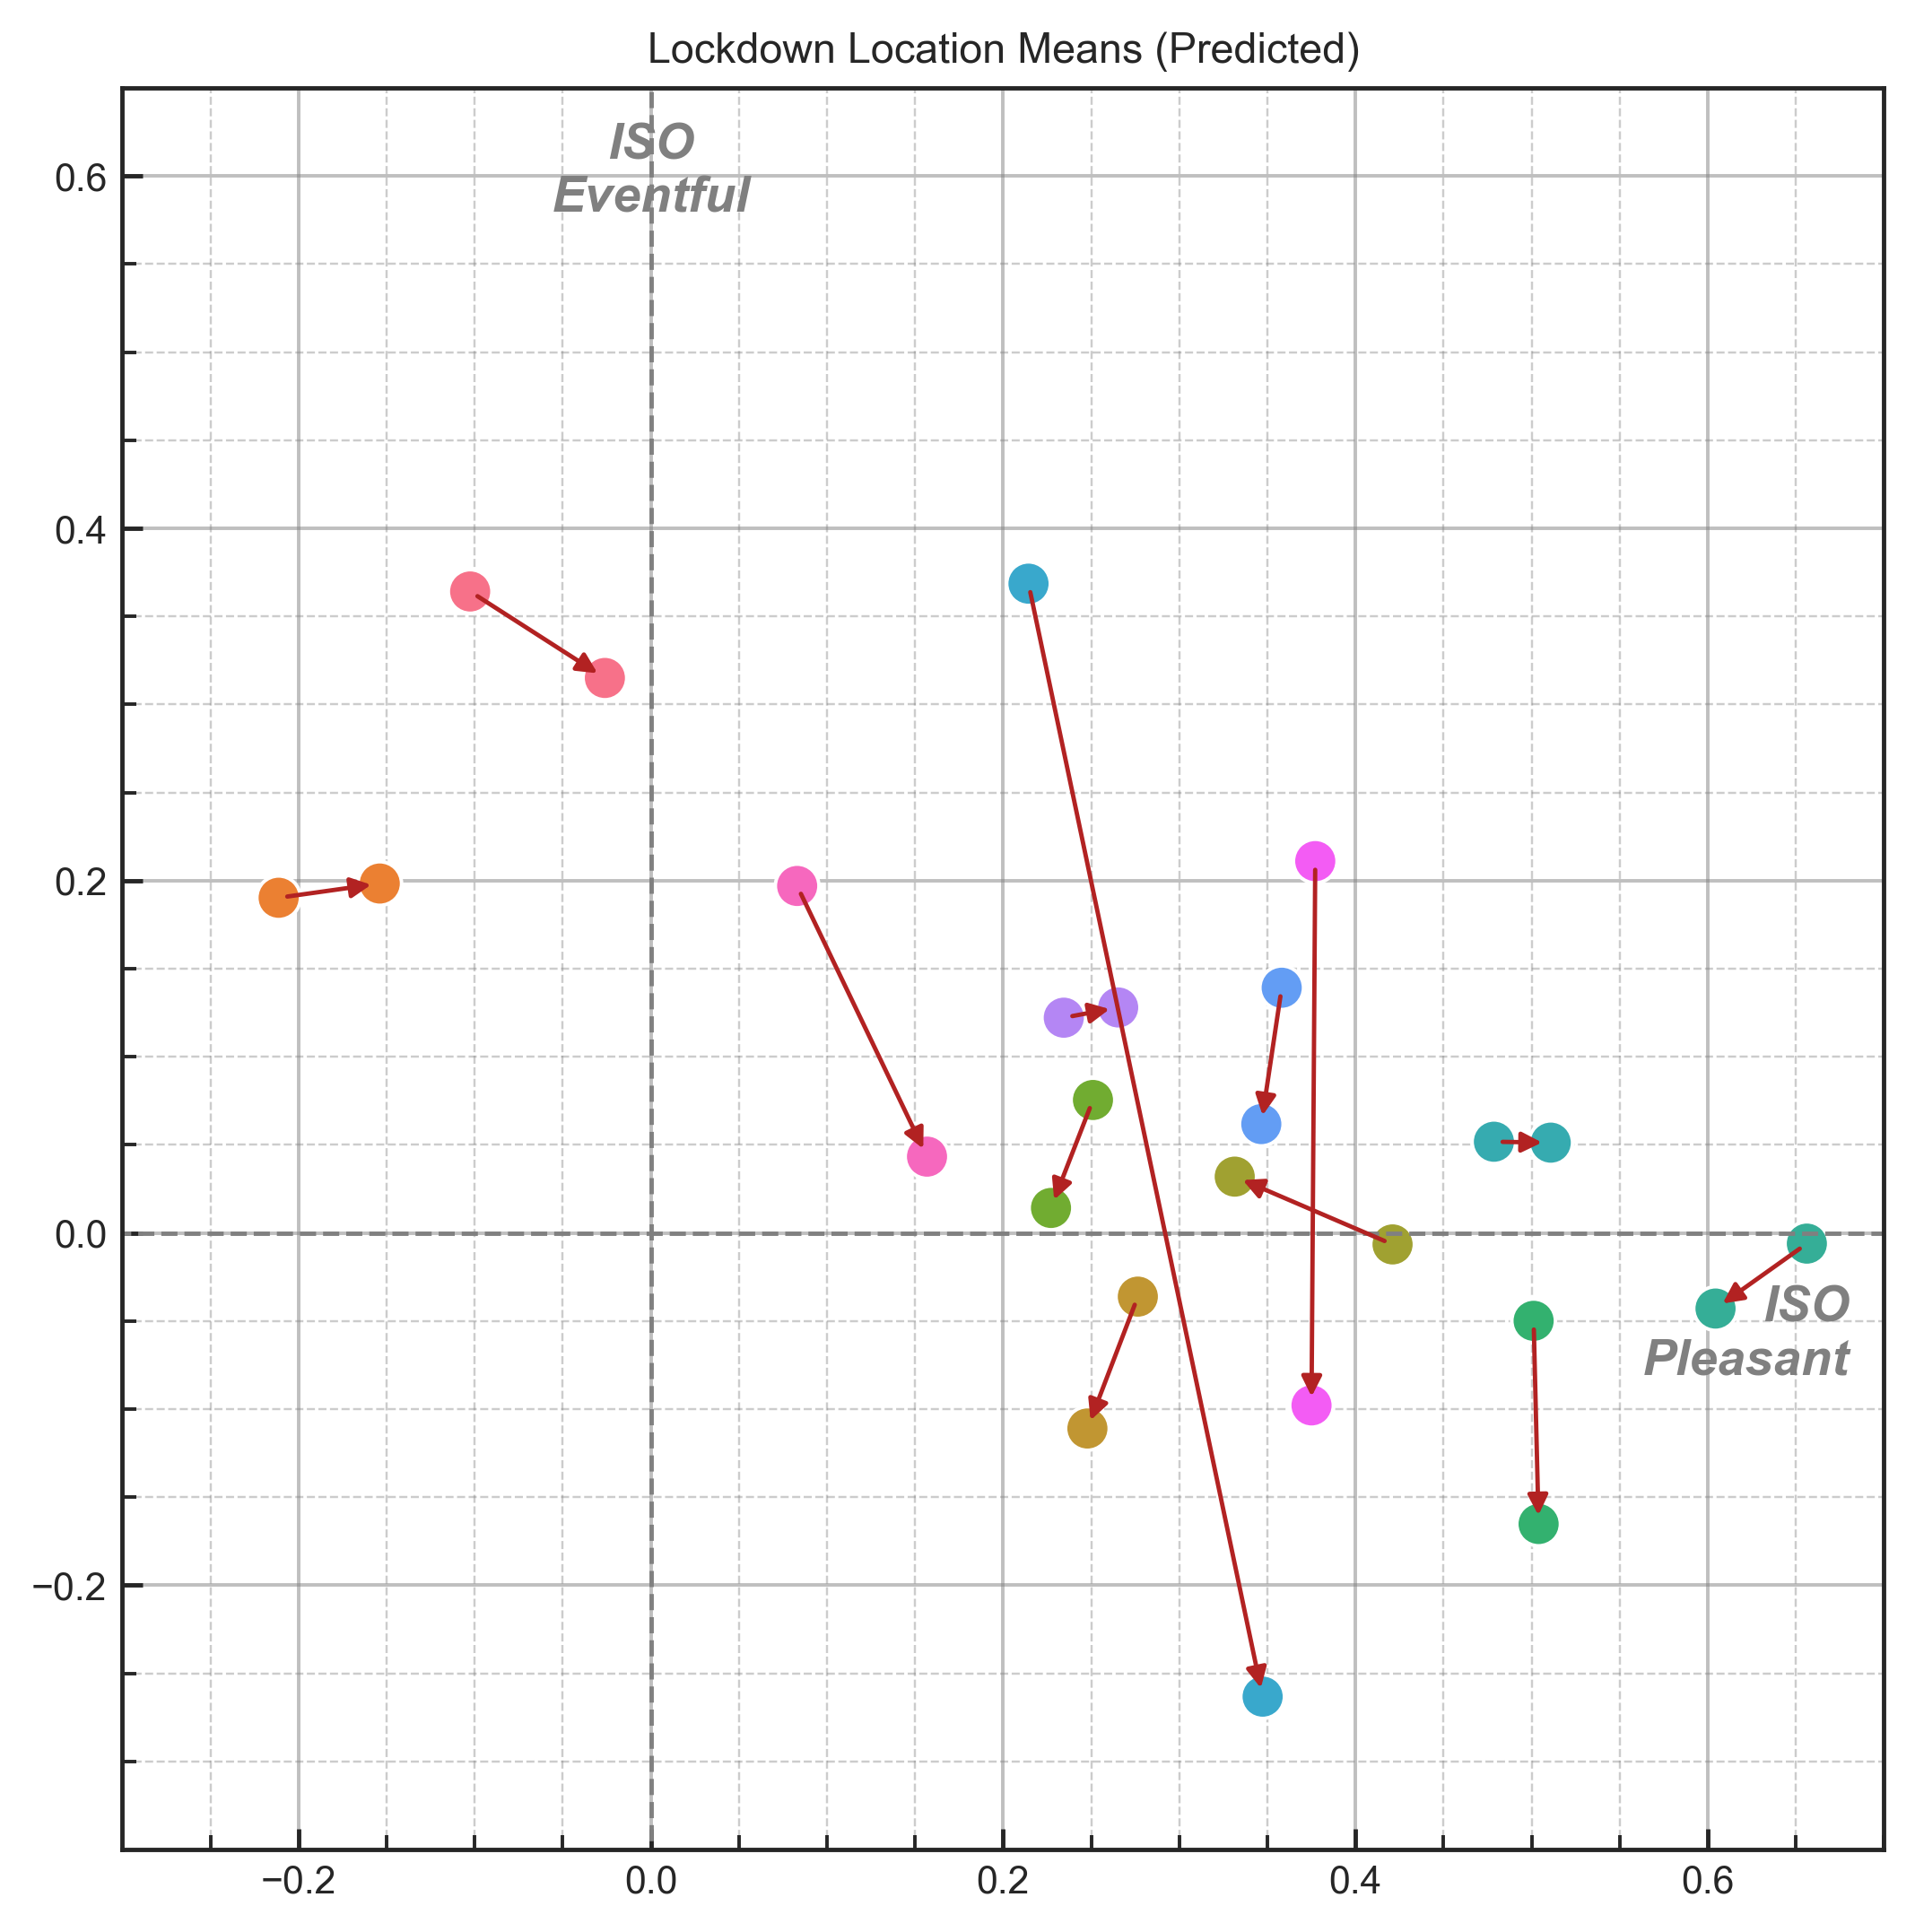

In [39]:
sns.set_context("paper")
sns.set_palette("Blues")
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
fig = plt.figure(figsize=(12, 12))
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

line_weights = 1

axes = fig.add_subplot(221, aspect="equal", xlim=(-0.3, 0.7), ylim=(-0.35, 0.65))

axes.title.set_text('Lockdown Location Means (Predicted)')

sns.scatterplot(
    data=prelockdown_summary,
    x="ISOPleasant",
    y="ISOEventful",
    hue="LocationID",
    s=100,
    ax=axes,
    legend=False,
    palette=sns.color_palette('husl', 13)
)

sns.scatterplot(
    data=lockdown_summary,
    x="ISOPleasant",
    y="ISOEventful",
    hue="LocationID",
    s=100,
    ax=axes,
    legend=False,
    palette=sns.color_palette('husl', 13)
)
for i in range(len(lockdown_summary['LocationID'])):
    axes.annotate(
        text="",
        xy=(lockdown_summary['ISOPleasant'][i], lockdown_summary['ISOEventful'][i]),
        xytext=(prelockdown_summary['ISOPleasant'][i], prelockdown_summary['ISOEventful'][i]),
        arrowprops=dict(arrowstyle="-|>", color='firebrick', lw=line_weights),
    )



# grids and ticks
axes.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
axes.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())

axes.grid(b=True, which="major", color="grey", alpha=0.5)
axes.grid(
    b=True,
    which="minor",
    color="grey",
    linestyle="dashed",
    linewidth=0.5,
    alpha=0.4,
)

# hide axis labels
axes.xaxis.label.set_visible(False)
axes.yaxis.label.set_visible(False)

# Add lines and labels for circumplex model
axes.plot(  # horizontal line
    [-1, 1],
    [0, 0],
    # transform=axes.transAxes,
    linestyle="dashed",
    color="grey",
    alpha=1,
    lw=line_weights
)
axes.plot(  # vertical line
    [0, 0],
    [1, -1],
    # transform=axes.transAxes,
    linestyle="dashed",
    color="grey",
    alpha=1,
    lw=line_weights
)
fontdict = {
    "fontstyle": "italic",
    "fontsize": "large",
    "fontweight": "bold",
    "c": "grey",
    "alpha": 1,
}

axes.text(  # ISO Pleasant label
    x=0.98,
    y=0.27,
    s="ISO\nPleasant",
    ha="right",
    fontdict=fontdict,
    transform=axes.transAxes,
)
axes.text(  # ISO Eventful label
    x=0.3,
    y=0.98,
    s="ISO\nEventful",
    ha="center",
    va="top",
    fontdict=fontdict,
    transform=axes.transAxes,
)


def iso_annotations(axes, loc_idx, x_adj=0, y_adj=0, ha="center"):
    axes.annotate(
        text=prelockdown_summary["LocationID"][loc_idx],
        xy=(prelockdown_summary["ISOPleasant"][loc_idx], prelockdown_summary["ISOEventful"][loc_idx]),
        xytext=(
            prelockdown_summary["ISOPleasant"][loc_idx] + x_adj,
            prelockdown_summary["ISOEventful"][loc_idx] + y_adj,
        ),
        ha=ha,
        arrowprops=dict(arrowstyle="-", ec="black"),
        annotation_clip=True,
    )

# iso_annotations(axes, 0, x_adj=-0, y_adj=0.08, ha="right")  # Camden Town
# iso_annotations(axes, 1, x_adj=-0, y_adj=-0.08, ha="center")  # Euston Tap
# iso_annotations(axes, 2, x_adj=-0, y_adj=-0.05, ha='right')  # Marchmont Garden
# iso_annotations(axes, 3, x_adj=0.03, y_adj=0.07, ha="left")  # MonumentoGaribaldi
# iso_annotations(axes, 4, x_adj=-0.02, y_adj=-0.05, ha="right")  # St Pancras Lock
# iso_annotations(axes, 5, x_adj=-0.02, y_adj=-0.08, ha="center")  # Regents Park Fields
# iso_annotations(axes, 6, x_adj=-0.03, y_adj=0.05, ha="center")  # Regents Park Japan
# iso_annotations(axes, 7, x_adj=-0.02, y_adj=-0.04, ha="right")  # Russell sq
# iso_annotations(axes, 8, x_adj=-0, y_adj=0.05, ha="right")  # SanMarco
# iso_annotations(axes, 9, x_adj=0.02, y_adj=0.07, ha='center')  # St Pauls Cross
# iso_annotations(axes, 10, x_adj=-0.02, y_adj=0.07, ha='left')  # St Pauls Row
# iso_annotations(axes, 11, x_adj=-0, y_adj=0.05, ha='right')  # Tate Modern
# iso_annotations(axes, 12, x_adj=-0, y_adj=0.05, ha='right')  # Torrington Sq

plt.tight_layout()
plt.show()
# plt.savefig('LockdownCircumplexMovement.jpg')


### Differences in soundscape assessments from Lockdown (During[Predicted] - Pre[Actual])

In [53]:
diff_summaries = pd.DataFrame(summaries.loc[summaries.Lockdown==1, "LocationID"])
diff_summaries["Pleasant_diff"]  = summaries.loc[summaries.Lockdown==1, "ISOPleasant"] - summaries.loc[summaries.Lockdown==0]["ISOPleasant"]
diff_summaries["Eventful_diff"]  = summaries.loc[summaries.Lockdown==1, "ISOEventful"] - summaries.loc[summaries.Lockdown==0]["ISOEventful"]
diff_summaries

,LocationID,Pleasant_diff,Eventful_diff
LocationID,,,
CamdenTown,CamdenTown,0.076484,-0.049090
EustonTap,EustonTap,0.057391,0.008080
MarchmontGarden,MarchmontGarden,-0.028623,-0.074855
MonumentoGaribaldi,MonumentoGaribaldi,-0.089589,0.038480
PancrasLock,PancrasLock,-0.023821,-0.061285
RegentsParkFields,RegentsParkFields,0.002824,-0.115329
RegentsParkJapan,RegentsParkJapan,-0.051851,-0.036858
RussellSq,RussellSq,0.032252,-0.000527
SanMarco,SanMarco,0.132900,-0.631782


In [54]:
distances = np.sqrt(diff_summaries['Pleasant_diff']**2 + diff_summaries['Eventful_diff']**2)
distances

LocationID
CamdenTown            0.090883
EustonTap             0.057957
MarchmontGarden       0.080140
MonumentoGaribaldi    0.097503
PancrasLock           0.065752
RegentsParkFields     0.115363
RegentsParkJapan      0.063616
RussellSq             0.032256
SanMarco              0.645609
StPaulsCross          0.078262
StPaulsRow            0.031412
TateModern            0.308970
TorringtonSq          0.170416
dtype: float64

I think, rather than a formal clustering analysis which doesn't seem terribly useful, we can instead create some reasonable groups of behaviour. If we look at the total distance moved, we can perhaps make three groups: 1) little movement (<0.1), 2) some movement (>0.1), 3) Very high movement (>0.3).

These groups are:

1) No Movement (<0.05): StPaulsRow, EustonTap, RussellSq

2) Some Movement (0.06 - 0.15) : CamdenTown, MarchmontGarden, MonumentoGaribaldi, PancrasLock, RegentsParkFields, RegentsParkJapan, StPaulsCross

3) Large Movement (>0.15) : SanMarco, TateModern, TorringtonSq

Or:

1) No movement: StPaulsRow, EustonTap, RussellSq

2) Toward Monotonous: RegentsParkJapan, PancrasLock, MarchmontGarden, StPaulsCross, RegentsParkFields

3) Toward Calm: SanMarco, TateModern, TorringtonSq, CamdenTown

4) Toward Chaotic: MonumentoGaribaldi

Of groups 2 and 3, we can extract some further patterns regarding the direction of movement. CamdenTown and EustonTap show a Calm-direction movement, with increased pleasantness and decreased eventfulness.  MonumentoGaribaldi and RussellSq have a Chaotic-direction. StPaulsRow by contrast has a pretty strict Pleasant movement, with little change in the Eventfulness. 

MonumentoGaribaldi went Chaotic because of the presence of leafblowers during one of the lockdown sessions. RussellSq may have moved Chaotic for two reasons -> 1. the fountain was turned off, losing the energetic and positive masking of the water sounds, 2. decreased presence of people, with not as much decrease in noise levels.

SanMarco shows the greatest change by far, with a huge shift in the Calm-direction. It has moved so much that it has changed from the *most vibrant* to now the *most calm* location. 

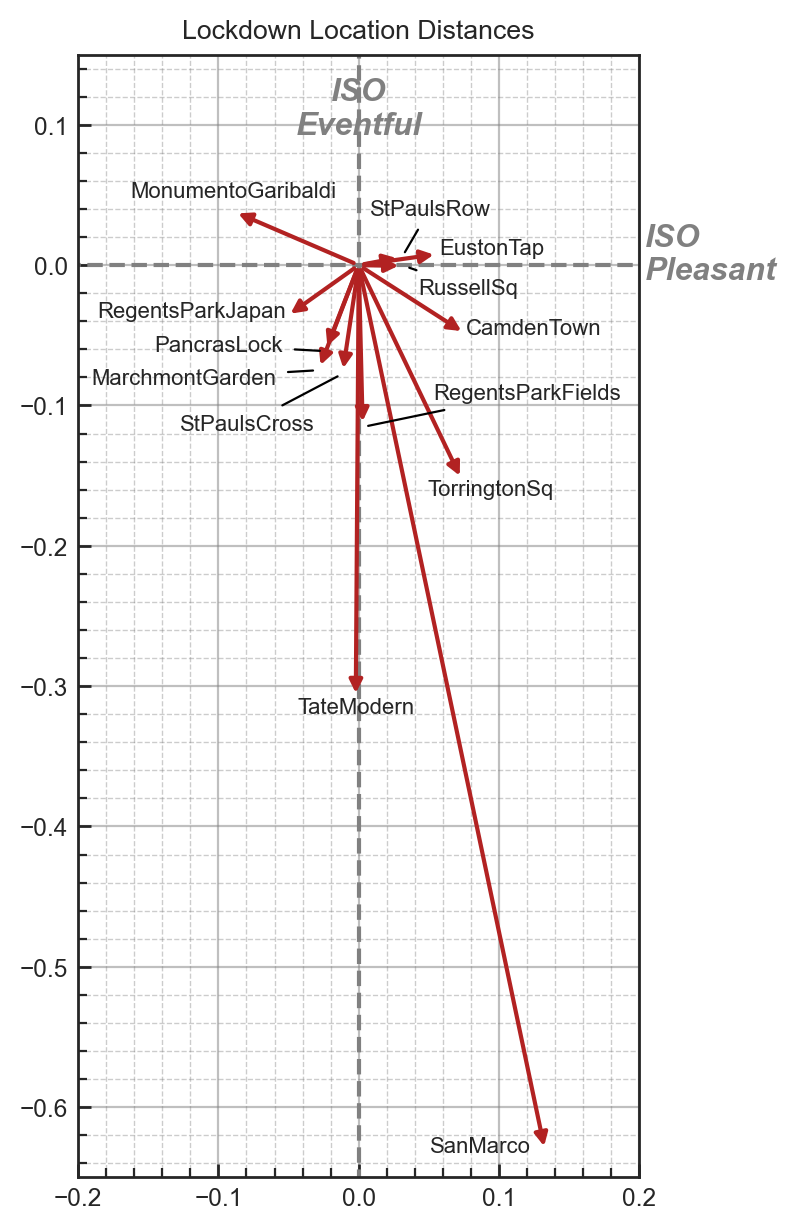

In [96]:
sns.set_context("paper")
sns.set_palette("Blues")
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
fig = plt.figure(figsize=(12, 12))
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

line_weights = 1.5

ax = fig.add_subplot(221, aspect="equal", xlim=(-0.2, 0.2), ylim=(-0.65, 0.15))

ax.title.set_text('Lockdown Location Distances')

for i in range(len(diff_summaries['LocationID'])):
    ax.annotate(
        text="",
        xy=(diff_summaries['Pleasant_diff'][i], diff_summaries['Eventful_diff'][i]),
        xytext=(0,0),
        arrowprops=dict(arrowstyle="-|>", color='firebrick', lw=line_weights),
    )

# grids and ticks
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())

ax.grid(b=True, which="major", color="grey", alpha=0.5)
ax.grid(
    b=True,
    which="minor",
    color="grey",
    linestyle="dashed",
    linewidth=0.5,
    alpha=0.4,
)

# hide axis labels
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

# Add lines and labels for circumplex model
ax.plot(  # horizontal line
    [-1, 1],
    [0, 0],
    # transform=axes.transAxes,
    linestyle="dashed",
    color="grey",
    alpha=1,
    lw=line_weights
)
ax.plot(  # vertical line
    [0, 0],
    [1, -1],
    # transform=axes.transAxes,
    linestyle="dashed",
    color="grey",
    alpha=1,
    lw=line_weights
)
fontdict = {
    "fontstyle": "italic",
    "fontsize": "large",
    "fontweight": "bold",
    "c": "grey",
    "alpha": 1,
}

ax.text(  # ISO Pleasant label
    x=1.01,
    y=0.8,
    s="ISO\nPleasant",
    ha="left",
    fontdict=fontdict,
    transform=ax.transAxes,
)
ax.text(  # ISO Eventful label
    x=0.5,
    y=0.98,
    s="ISO\nEventful",
    ha="center",
    va="top",
    fontdict=fontdict,
    transform=ax.transAxes,
)


def iso_annotations(axes, loc_idx, x_adj=0, y_adj=0, ha="center", arrowprops=dict(arrowstyle="-", ec="black")):
    axes.annotate(
        text=diff_summaries["LocationID"][loc_idx],
        xy=(diff_summaries["Pleasant_diff"][loc_idx], diff_summaries["Eventful_diff"][loc_idx]),
        xytext=(
            diff_summaries["Pleasant_diff"][loc_idx] + x_adj,
            diff_summaries["Eventful_diff"][loc_idx] + y_adj,
        ),
        ha=ha,
        arrowprops=arrowprops,
        annotation_clip=False,
        fontsize="small"
    )

iso_annotations(ax, 0, x_adj=-0, y_adj=0, ha="left", arrowprops=None)  # Camden Town
iso_annotations(ax, 1, x_adj=-0, y_adj=-0, ha="left", arrowprops=None)  # Euston Tap
iso_annotations(ax, 2, x_adj=-0.03, y_adj=-0.01, ha='right')  # Marchmont Garden
iso_annotations(ax, 3, x_adj=0, y_adj=0.01, ha="center", arrowprops=None)  # MonumentoGaribaldi
iso_annotations(ax, 4, x_adj=-0.03, y_adj=0, ha="right")  # St Pancras Lock
iso_annotations(ax, 5, x_adj=0.05, y_adj=0.02, ha="left")  # Regents Park Fields
iso_annotations(ax, 6, x_adj=-0, y_adj=0, ha="right", arrowprops=None)  # Regents Park Japan
iso_annotations(ax, 7, x_adj=0.01, y_adj=-0.02, ha="left")  # Russell sq
iso_annotations(ax, 8, x_adj=-0.01, y_adj=0, ha="right", arrowprops=None)  # SanMarco
iso_annotations(ax, 9, x_adj=-0.02, y_adj=-0.04, ha='right')  # St Pauls Cross
iso_annotations(ax, 10, x_adj=0.02, y_adj=0.03, ha='center')  # St Pauls Row
iso_annotations(ax, 11, x_adj=-0, y_adj=-0.01, ha='center', arrowprops=None)  # Tate Modern
iso_annotations(ax, 12, x_adj=0.02, y_adj=-0.01, ha='center', arrowprops=None)  # Torrington Sq

plt.tight_layout()
plt.show()
# plt.savefig('LockdownLocationVectors.jpg')


### Rankings of degree of change for each soundscape assessment

In [13]:
diff_summaries.drop("LocationID", axis=1).abs().rank()

,Pleasant_diff,Eventful_diff
LocationID,,
CamdenTown,11.0,3.0
EustonTap,9.0,1.0
MarchmontGarden,5.0,8.0
MonumentoGaribaldi,12.0,5.0
PancrasLock,4.0,10.0
RegentsParkFields,2.0,7.0
RegentsParkJapan,8.0,2.0
RussellSq,7.0,4.0
SanMarco,13.0,13.0
